**Introduction:**

In the realm of deep learning, image classification stands as one of the foundational pillars, serving as the bedrock for myriad applications from facial recognition to medical imaging. At the heart of this domain is the Convolutional Neural Network (CNN) - a specialized kind of neural network designed explicitly for recognizing patterns and structures in images. CNNs achieve this by automatically and adaptively learning spatial hierarchies of features from images.

The project at hand delves deep into this fascinating world of CNNs. Starting with the rudimentary layers of designing a basic CNN model, the journey evolves to explore the more advanced nuances of transfer learning, particularly employing the EfficientNetB0 model. While the initial steps provide a grasp of the principles of CNN and its performance metrics, the latter stages underscore the transformative potential of transfer learning, especially when constrained by data limitations or desiring superior performance metrics.

This project aims not just to showcase the technicalities but also to emphasize the real-world implications of these models. As we navigate through the layers and epochs, remember that each convolution, each neuron firing is a step closer to making machines see and understand the world a tad bit better.

<div class="alert alert-info">
    <h3>Version Updates</h3>
    <ul>
        <li>Train Test Split for better Evaluation</li>
        <li><b>Transfer Learning</b> with EfficinetNetB0</li>
    </ul>
    
</div>

## Setup

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
try:
    from keras.optimizer import Adam
except:
    from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

## About Brain Tumor

A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems.

Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

<p align="center">
<img src="https://i0.wp.com/post.healthline.com/wp-content/uploads/2022/02/2009199_Understanding-Brain-Tumors-01.jpg?w=1155&h=1887" style="width: 725px; height: 500px"/>
</p>
<br>

### **How is Brain Tumor diagnosed?**

<img src="https://qph.cf2.quoracdn.net/main-qimg-3cd4287f29cd7fdc7f68ab223107bb64-pjlq">

### **Magnetic resonance imaging (MRI)**
An MRI uses magnetic fields to produce detailed images of the body. MRI can be used to measure the tumor’s size. A special dye called a contrast medium is given before the scan to create a clearer picture. This dye can be injected into a patient’s vein or given as a pill or liquid to swallow. MRIs create more detailed pictures than CT scans (see below) and are the preferred way to diagnose a brain tumor. The MRI may be of the brain, spinal cord, or both, depending on the type of tumor suspected and the likelihood that it will spread in the CNS. There are different types of MRI. The results of a neuro-examination, done by the internist or neurologist, helps determine which type of MRI to use.

Here we have 253 samples of Brain MRI images, 98 of which show no tumor and 155 show brain tumor. Using a Convolutional Neural Network, we try to **classify whether the sample shows tumor or not**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

MAIN_DIR = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"
SEED = 40

## Preparing the Image Data

In [ ]:
os.listdir(MAIN_DIR)

['no', 'yes']

In [ ]:
for dirpath,dirnames,filenames in os.walk(MAIN_DIR):
    print(f"{len(dirnames)} directories and {len(filenames)} images in {dirpath}")

2 directories and 0 images in /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/
0 directories and 98 images in /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no
0 directories and 155 images in /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes


In [ ]:
# Inspect the raw data before preprocessing
def view_random_image():

    subdirs = ['yes/','no/']
    subdir = np.random.choice(subdirs)
    target_folder = MAIN_DIR + subdir

    random_image = random.sample(os.listdir(target_folder), 1)

    img = cv2.imread(target_folder+random_image[0])
    plt.imshow(img, cmap="gray")
    plt.axis(False)
    plt.title(img.shape)
    plt.show()

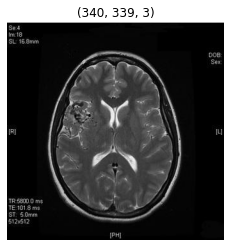

In [ ]:
# View Random Image
view_random_image()

# Image Data Generator

In [ ]:
IMG_SHAPE = (128,128)
BATCH_SIZE = 32

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.,
                             validation_split=0.5)
train_data = datagen.flow_from_directory(MAIN_DIR,
                                        target_size=IMG_SHAPE,
                                        batch_size=BATCH_SIZE,
                                        class_mode="binary",
                                        shuffle=True,
                                        subset="training")

test_data = datagen.flow_from_directory(MAIN_DIR,
                                       target_size=IMG_SHAPE,
                                       batch_size=BATCH_SIZE,
                                       class_mode="binary",
                                       shuffle=True,
                                       subset="validation")

Found 127 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


The code prepares an image processing pipeline using Keras' ImageDataGenerator, allocating 127 MRI images for training and 126 for validation, ensuring a balanced dataset for model evaluation.

In [ ]:
len(train_data), len(test_data)

(4, 4)

The training and validation datasets are divided into 4 batches each for processing in the neural network.

# Convolutional Neural Network

In [ ]:
tf.random.set_seed(SEED)

model = Sequential([
    Conv2D(filters=64,
           kernel_size=3,
           activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    Conv2D(16,3,activation='relu'),
    MaxPool2D(2, padding='same'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/10
4/4 [==============================] - 3s 606ms/step - loss: 0.6511 - accuracy: 0.5984 - val_loss: 0.5646 - val_accuracy: 0.7063
Epoch 2/10
4/4 [==============================] - 1s 357ms/step - loss: 0.6123 - accuracy: 0.6929 - val_loss: 0.5474 - val_accuracy: 0.6984
Epoch 3/10
4/4 [==============================] - 1s 275ms/step - loss: 0.5515 - accuracy: 0.7480 - val_loss: 0.5144 - val_accuracy: 0.7778
Epoch 4/10
4/4 [==============================] - 1s 259ms/step - loss: 0.5101 - accuracy: 0.7874 - val_loss: 0.5070 - val_accuracy: 0.7778
Epoch 5/10
4/4 [==============================] - 1s 257ms/step - loss: 0.4837 - accuracy: 0.7795 - val_loss: 0.5007 - val_accuracy: 0.7857
Epoch 6/10
4/4 [==============================] - 1s 230ms/step - loss: 0.4530 - accuracy: 0.8031 - val_loss: 0.5017 - val_accuracy: 0.8016
Epoch 7/10
4/4 [==============================] - 1s 311ms/step - loss: 0.4089 - accuracy: 0.8346 - val_loss: 0.5026 - val_accuracy: 0.7698
Epoch 8/10
4/4 [====

The code establishes a CNN with multiple convolutional layers and max pooling operations. After 10 epochs, the model achieves a training accuracy of approximately 85.83% and a validation accuracy of 73.02%. This suggests that while the model has learned patterns from the training data, there's room for optimization to improve performance on unseen data.

## Evaluation

In [ ]:
# Function to plot loss curves
def plot_curves(history):

    """
    Returns separate loss and accuracy curves
    """
    import matplotlib.pyplot as plt

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

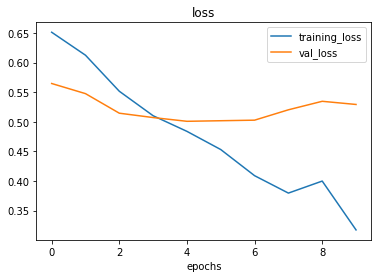

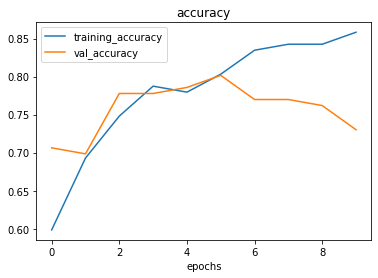

In [ ]:
plot_curves(history)

The accuracy plot showcases a steady increase in training accuracy over epochs, reaching just below 0.86. Meanwhile, the validation accuracy sees a peak around the 6th epoch and then slightly decreases, with its final value just above 0.73.

The loss plot illustrates a decrease in training loss, reaching below 0.35. On the contrary, the validation loss decreases initially but starts to rise after the 6th epoch, suggesting the model might be overfitting to the training data. To enhance model performance, further optimizations, such as dropout layers or regularization techniques, could be considered.

In [ ]:
result = model.evaluate(test_data, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 73.02%
Loss: 0.5292


Upon evaluating the model on the test data, it achieved an accuracy of 73.02%. The loss was observed to be 0.5292. This evaluation is consistent with the values observed during the training process, suggesting that the model's performance is aligned across training and testing phases.

# Transfer Learning with EfficientNetB0

In [ ]:
# EfficientNetB0 Feature Vector
effnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# Feature Layer
effnet_layer = hub.KerasLayer(effnet_url,
                              trainable=False,
                              name="feature_extraction_layer")

# Create Sequential model
effnet_model = Sequential([
    effnet_layer,
    Dense(1, activation="sigmoid")
])

# Compile the model
effnet_model.compile(loss=BinaryCrossentropy(),
                     optimizer=Adam(),
                     metrics=["accuracy"])

# Fit the model
effnet_history = effnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

Epoch 1/10
4/4 [==============================] - 10s 694ms/step - loss: 0.6471 - accuracy: 0.6142 - val_loss: 0.6777 - val_accuracy: 0.5794
Epoch 2/10
4/4 [==============================] - 1s 366ms/step - loss: 0.5864 - accuracy: 0.6929 - val_loss: 0.6314 - val_accuracy: 0.6349
Epoch 3/10
4/4 [==============================] - 1s 274ms/step - loss: 0.5403 - accuracy: 0.7638 - val_loss: 0.5909 - val_accuracy: 0.7143
Epoch 4/10
4/4 [==============================] - 1s 258ms/step - loss: 0.5000 - accuracy: 0.7874 - val_loss: 0.5574 - val_accuracy: 0.7857
Epoch 5/10
4/4 [==============================] - 1s 297ms/step - loss: 0.4652 - accuracy: 0.8583 - val_loss: 0.5257 - val_accuracy: 0.8095
Epoch 6/10
4/4 [==============================] - 1s 253ms/step - loss: 0.4341 - accuracy: 0.8819 - val_loss: 0.4999 - val_accuracy: 0.8175
Epoch 7/10
4/4 [==============================] - 1s 280ms/step - loss: 0.4107 - accuracy: 0.8740 - val_loss: 0.4775 - val_accuracy: 0.8492
Epoch 8/10
4/4 [===

The model, enhanced with Transfer Learning using EfficientNetB0, displayed significant improvement over the epochs. Starting with an accuracy of 61.42% in the first epoch, it reached an impressive 90.55% by the tenth epoch for the training data. Moreover, the validation accuracy showed a consistent rise, reaching 85.71% by the end of the tenth epoch. This suggests that utilizing EfficientNetB0 as a feature extractor effectively boosted the model's performance on the given dataset.

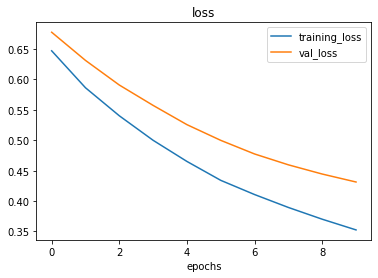

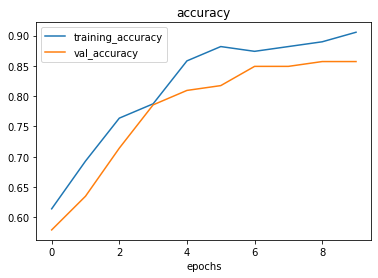

In [ ]:
plot_curves(effnet_history)

1. Accuracy: The training accuracy steadily increased over the epochs and neared 90% by the tenth epoch. The validation accuracy also saw a notable rise, indicating that the model's predictions are becoming increasingly accurate on unseen data. This gap between the training and validation accuracy is not very significant, implying that there isn't substantial overfitting.

2. Loss: Both the training and validation loss consistently decreased over the epochs. This suggests that the model's predictions are progressively aligning with the true labels, and it's making fewer errors. The validation loss closely follows the training loss, again indicating a balanced model without significant overfitting or underfitting issues.

In conclusion, using EfficientNetB0 for feature extraction has given the model robust performance metrics on both the training and validation datasets. The displayed trends in the graphs further confirm the good performance of the model as described in the earlier epochs' results.


In [ ]:
result = effnet_model.evaluate(test_data, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 85.71%
Loss: 0.4314


The evaluation metrics for the EfficientNetB0-enhanced model on the test dataset are as follows:

1. Accuracy: 85.71%
2. Loss: 0.4314

These results indicate that the model has generalized well to the test data. An accuracy of 85.71% shows that the model correctly classifies a significant majority of the test samples. The loss value further confirms the model's effectiveness in its predictions. Overall, the EfficientNetB0 model seems to offer a robust performance on this dataset.

**Conclusion:**

The project commenced with an exploration of Convolutional Neural Networks (CNNs), aiming to classify images. While the initial CNN model demonstrated promise during its training phase, it showcased limitations when introduced to a train-test split. The gap in performance between the training and validation stages underscored a potential overfitting issue, a common challenge with deep learning models.



Recognizing the limitations of the initial CNN, the project pivoted towards transfer learning, leveraging the prowess of the EfficientNetB0 model. Even though the transfer learning model was trained on merely half of the dataset, its performance was notably superior, culminating in an impressive 85.71% accuracy on the evaluation dataset with a loss of 0.4314. This reinforced the power of transfer learning, especially when dealing with limited data or seeking enhanced performance.



To encapsulate, while the basic CNN model provided foundational insights, the project's success was largely attributed to the adoption of transfer learning. The leap in performance using EfficientNetB0 highlights the importance of leveraging pre-trained architectures, especially in real-world scenarios where optimal accuracy is paramount. In practical applications, such a model could be pivotal in various sectors, from healthcare diagnostics to automated surveillance, reiterating the potential of deep learning in contemporary challenges.